Abstract:
The objective was to build a practical model that could accurately forecast Melbourne House Prices. Most people think that since the price of a house varies so much, it is hard to predict with precision. The price is the dependent variable in this dataset, whereas the other factors are independent. The primary determinants of house pricing ought to be chosen first. Next, using linear regression, a model for housing price prediction should be created. To test the model, that ought to be applied to the housing dataset in Melbourne. It can be concluded from the data analysis and test that, although the algorithm can still be enhanced with more sophisticated machine learning techniques, the linear regression model is capable of predicting and analysing the housing price to a certain extent.

Dataset:

The dataset includes Address, Type, Suburb, Method,SellerG, Rooms, Price, Real Estate Agent, Date, Distance, CouncilArea 

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     -------------------------------------- 265.2/265.2 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293970 sha256=5282ec90ee6400b317d14d9f7c8af6e3fa1df73cf7a37f1665dc2265e70a3237
  Stored in directory: c:\users\chaitrali katkar\appdata\local\pip\cache\wheels\1f\a0\9a\0990c3a2c357eb60cbba0677d681b40ddce4af46d69aca1a2d
Successfully built h2o


In [1]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
min_mem_size=6 
run_time=222

In [4]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

2


In [5]:

port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:34279..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Corretto-17.0.8.8.1 (build 17.0.8.1+8-LTS, mixed mode, sharing)
  Starting server from C:\Users\Chaitrali Katkar\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\CHAITR~1\AppData\Local\Temp\tmpvqiuj9ba
  JVM stdout: C:\Users\CHAITR~1\AppData\Local\Temp\tmpvqiuj9ba\h2o_Chaitrali_Katkar_started_from_python.out
  JVM stderr: C:\Users\CHAITR~1\AppData\Local\Temp\tmpvqiuj9ba\h2o_Chaitrali_Katkar_started_from_python.err
  Server is running at http://127.0.0.1:34279
Connecting to H2O server at http://127.0.0.1:34279 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_Chaitrali_Katkar_0n8q25
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.938 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [6]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/ChaitraliKatkar/Data_Science_Methods-Tools/main/MELBOURNE_HOUSE_PRICES_LESS.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
df.head()

Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
Abbotsford,49 Lithgow St,3,h,1.49e+06,S,Jellis,2017-01-04 00:00:00,3067,Northern Metropolitan,4019,3,Yarra City Council
Abbotsford,59A Turner St,3,h,1.22e+06,S,Marshall,2017-01-04 00:00:00,3067,Northern Metropolitan,4019,3,Yarra City Council
Abbotsford,119B Yarra St,3,h,1.42e+06,S,Nelson,2017-01-04 00:00:00,3067,Northern Metropolitan,4019,3,Yarra City Council
Aberfeldie,68 Vida St,3,h,1.515e+06,S,Barry,2017-01-04 00:00:00,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
Airport West,92 Clydesdale Rd,2,h,670000,S,Nelson,2017-01-04 00:00:00,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
Airport West,4/32 Earl St,2,t,530000,S,Jellis,2017-01-04 00:00:00,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
Airport West,3/74 Hawker St,2,u,540000,S,Barry,2017-01-04 00:00:00,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
Airport West,1/26 Highridge Cr,3,h,715000,SP,Nelson,2017-01-04 00:00:00,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
Albanvale,1 Jackson Cct,6,h,nan,PI,hockingstuart,2017-01-04 00:00:00,3021,Western Metropolitan,1899,14,Brimbank City Council
Albert Park,18 Mills St,3,h,1.925e+06,S,Cayzer,2017-01-04 00:00:00,3206,Southern Metropolitan,3280,3,Port Phillip City Council


In [8]:
df.describe()

Rows:63023
Cols:13

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
type,enum,enum,int,enum,int,enum,enum,time,int,enum,int,real,enum
mins,,,1.0,,85000.0,,,1457481600000.0,3000.0,,39.0,0.0,
mean,,,3.110594544848705,,997898.2414882414,,,1500474463875.7595,3125.673896831315,,7617.728130999792,12.6848293480158,
maxs,,,31.0,,11200000.0,,,1543968000000.0,3980.0,,21650.0,64.1,
sigma,,,0.9575513092737408,,593498.9190372769,,,25284830390.252132,125.62687746089355,,4424.423167331062,7.592015369125735,
zeros,,,0,,0,,,0,0,,0,287,
missing,0,0,0,0,14590,0,0,39327,0,0,0,0,0
0,Abbotsford,49 Lithgow St,3.0,h,1490000.0,S,Jellis,2017-01-04 00:00:00,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3.0,h,1220000.0,S,Marshall,2017-01-04 00:00:00,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3.0,h,1420000.0,S,Nelson,2017-01-04 00:00:00,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council


In [9]:
df.types

{'Suburb': 'enum',
 'Address': 'enum',
 'Rooms': 'int',
 'Type': 'enum',
 'Price': 'int',
 'Method': 'enum',
 'SellerG': 'enum',
 'Date': 'time',
 'Postcode': 'int',
 'Regionname': 'enum',
 'Propertycount': 'int',
 'Distance': 'real',
 'CouncilArea': 'enum'}

In [10]:
df.shape

(63023, 13)

In [11]:
df.shape

(63023, 13)

In [12]:
# Assuming df is your DataFrame
# Drop rows with any missing values
df = df.na_omit()

In [13]:
#Seperate Dependent variable from Independent variable
y = "Price"  # Assuming 'Price' is the column you're predicting
X = df.columns
X.remove(y)  # Remove the target variable from the predictors list
print(X)
print(y)

['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance', 'CouncilArea']
Price


In [14]:
train, test = df.split_frame(ratios=[.8], seed=1234)


In [15]:
print(train.shape)
print(test.shape)

(14640, 13)
(3575, 13)


In [16]:
# aml = H2OAutoML(max_models=20, seed=1, nfolds=10, exclude_algos=["StackedEnsemble"], verbosity="info")
# aml.train(x=X, y=y, training_frame=train)


# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

#pass the data through H20AutoML
aml.train(x=X,y=y,training_frame=train)  
     


AutoML progress: |
22:05:54.803: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/5
# GBM base models (used / total),1/1
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [17]:
print(aml.leaderboard)

model_id                                                   rmse          mse     mae     rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20240219_213630     291878  8.51929e+10  172542  0.219265               8.51929e+10
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_213630  291879  8.51932e+10  172830  0.219848               8.51932e+10
StackedEnsemble_AllModels_1_AutoML_1_20240219_213630     294331  8.66309e+10  173638  0.221073               8.66309e+10
GBM_grid_1_AutoML_1_20240219_213630_model_2              294652  8.68196e+10  175971  0.223986               8.68196e+10
GBM_5_AutoML_1_20240219_213630                           295194  8.71396e+10  174683  0.223518               8.71396e+10
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_213630  295208  8.71477e+10  174415  0.222118               8.71477e+10
GBM_grid_1_AutoML_1_20240219_213630_model_3              295490  8.73146e+10  176277  0.224357               8.73146e+10
GBM_2_AutoML_1_20240219_213630  

# Is the relationship significant?

In [18]:
# Is the relationship significant?You'll need to look at the performance of the best model on your test set:python
# # Evaluate the top model on the test set
perf = aml.leader.model_performance(test_data=test)
print(perf)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 84214937012.44443
RMSE: 290198.09960171074
MAE: 173824.74167856667
RMSLE: 0.22873041194204752
Mean Residual Deviance: 84214937012.44443
R^2: 0.7255290284435334
Null degrees of freedom: 3574
Residual degrees of freedom: 3567
Null deviance: 1097259740736863.2
Residual deviance: 301068399819488.8
AIC: 100098.39186884431


# Are any model assumptions violated?

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


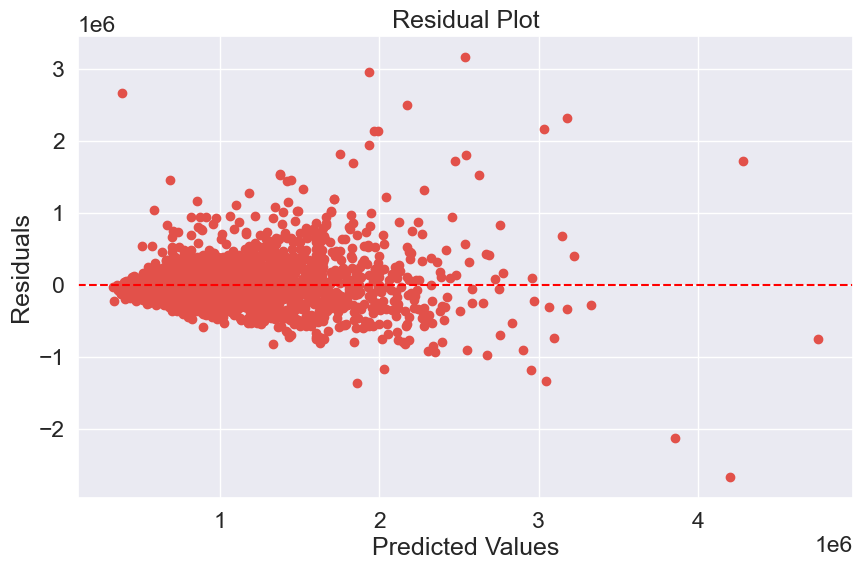

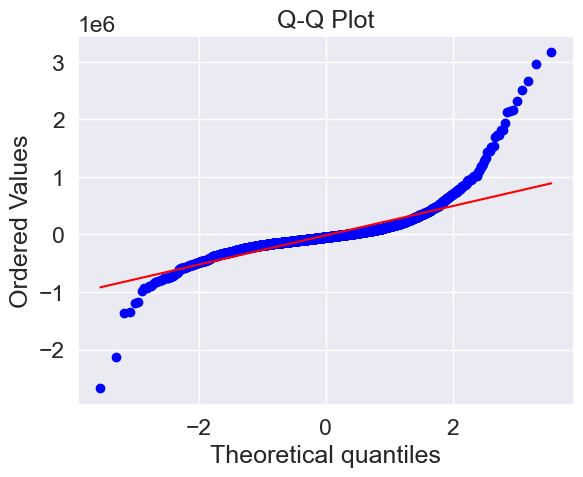

Variable importance is not available for the top model.


In [19]:

# Assuming H2O has already been initialized and the AutoML process has run

# Get the top model from the leaderboard
top_model = h2o.get_model(aml.leaderboard[0, 'model_id'])

# For linear models: Conduct residual analysis
if 'GLM' in str(top_model):  # Check if the top model is a Generalized Linear Model (GLM)
    predictions = top_model.predict(test)
    actuals = test['Price'].as_data_frame(use_pandas=True)
    preds = predictions.as_data_frame(use_pandas=True)
    
    residuals = actuals['Price'] - preds['predict']
    
    # Plotting residuals
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.scatter(preds['predict'], residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()
    
    # Checking for normality of residuals
    from scipy import stats
    stats.probplot(residuals.squeeze(), dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    # Feature Importance for tree-based models
# Feature Importance for tree-based models
if hasattr(top_model, 'varimp'):
    # Get variable importance
    importance = top_model.varimp(use_pandas=True)
    
    # Check if importance is not None
    if importance is not None:
        # Plotting feature importance if 'scaled_importance' is present in the DataFrame
        if 'scaled_importance' in importance.columns:
            plt.figure(figsize=(10, 6))
            sns.barplot(x='scaled_importance', y='variable', data=importance)
            plt.title('Feature Importance')
            plt.show()
        else:
            print("Column 'scaled_importance' not found in the importance DataFrame.")
    else:
        print("Variable importance is not available for the top model.")
else:
    print("The top model does not have the 'varimp' attribute.")






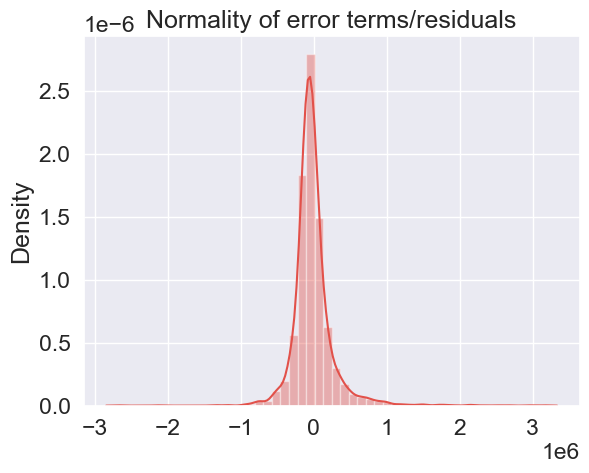

In [20]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')
     

<AxesSubplot:xlabel='Price', ylabel='Count'>

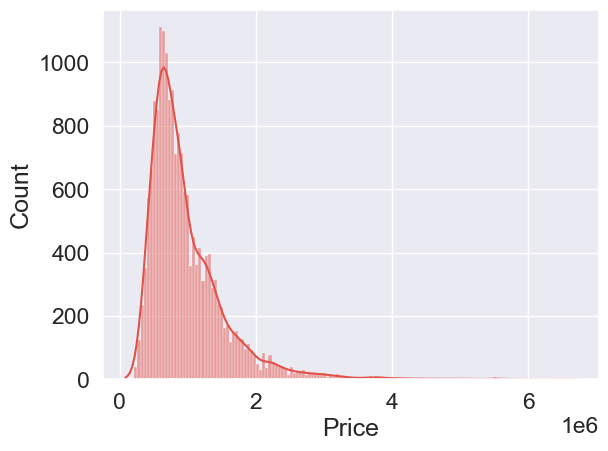

In [21]:
import seaborn as sns


# Assuming 'Price' is the name of the target variable column in your H2OFrame
# Convert the H2OFrame to a pandas DataFrame
df_pd = df.as_data_frame()

# Plot histogram of the 'Price' column using seaborn
sns.histplot(df_pd['Price'], kde=True)


# Is there any multicollinearity in the model?

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin

# Convert H2OFrame to pandas DataFrame
df_pd = df.as_data_frame()

# Preprocess: Select numerical columns for VIF computation, excluding 'Price' (target variable)
# You might want to include dummy variables for categorical features if necessary
numerical_features = df_pd.select_dtypes(include=[np.number]).drop(columns=['Price'])

class CalculateVIF(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=5.0):
        self.threshold = threshold

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        self.vif = pd.DataFrame()
        self.vif["Variable"] = X.columns
        self.vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        return self.vif[self.vif["VIF"] < self.threshold]

# Initialize VIF calculator
vif_calculator = CalculateVIF()

# Calculate VIF
vif = vif_calculator.fit_transform(numerical_features)
print(vif)


        Variable       VIF
0          Rooms  1.093280
2       Postcode  1.114842
3  Propertycount  1.006266
4       Distance  1.380514


# In the multivariate models are predictor variables independent of all the other predictor variables?

In [17]:
# Convert H2OFrame to pandas DataFrame
df_pd = df.as_data_frame()

# Selecting numerical features for simplicity, excluding 'Price'
# Note: For a comprehensive analysis, consider encoding categorical variables and adding them to this analysis
numerical_features = df_pd.select_dtypes(include=[np.number]).drop(columns=['Price'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_features.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(numerical_features.values, i) for i in range(len(numerical_features.columns))]

print(vif_data)


         feature         VIF
0          Rooms    1.093280
1           Date  619.469545
2       Postcode    1.114842
3  Propertycount    1.006266
4       Distance    1.380514


# Does the model make sense?

In [19]:
# Assuming H2O and the AutoML process have already been initialized and executed as in previous examples

# 1. Evaluate Model Performance on the Test Set
performance = aml.leader.model_performance(test_data=test)
print("Model Performance:")
print(performance)

# 2. Review Feature Importance (for models that support this)
try:
    feature_importance = aml.leader.varimp(use_pandas=True)
    print("Feature Importance:")
    print(feature_importance)
except AttributeError:
    print("Feature importance is not available for this model type.")

# 3. Make Predictions on a Sample/Test Set and Review
sample_predictions = aml.leader.predict(test[:10])
print("Sample Predictions:")
print(sample_predictions)

# Optionally, compare predictions with actual values to gauge reasonableness
actuals_vs_predictions = test[:10].as_data_frame(use_pandas=True)
actuals_vs_predictions['Predicted'] = sample_predictions.as_data_frame(use_pandas=True).iloc[:, 0]  # Adjust index if necessary
print("Actuals vs. Predicted:")
print(actuals_vs_predictions[['Price', 'Predicted']])  # Adjust column names as necessary


Model Performance:
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 84602118383.7284
RMSE: 290864.43299882574
MAE: 167757.3549120575
RMSLE: 0.218795216953564
Mean Residual Deviance: 84602118383.7284
R^2: 0.7242671377277667
Null degrees of freedom: 3574
Residual degrees of freedom: 3570
Null deviance: 1097259740736863.2
Residual deviance: 302452573221829.0
AIC: 100108.79039950314
Feature Importance:
None
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Sample Predictions:
         predict
     1.13651e+06
625586
724895
     1.56201e+06
535278
429310
947638
     1.03699e+06
900978
     2.24246e+06
[3575 rows x 1 column]

Actuals vs. Predicted:
        Price     Predicted
0     1515000  1.136506e+06
1      515000  6.255856e+05
2      720000  7.248949e+05
3     1386000  1.562012e+06
4      580000  5.352785e+05
...       ...           ...
3570   523500  6.044299e+05
3571   741000  6.910299e+05
3572   706000  8.572664

In [20]:
# Convert H2OFrame to pandas DataFrame
df_pd = df.as_data_frame()

categorical_vars = ['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'Postcode', 'Regionname', 'CouncilArea']
for var in categorical_vars:
    df_pd[var] = df_pd[var].astype('category')


import statsmodels.formula.api as smf

# Define the formula for the OLS model
formula = 'Price ~ Rooms + Propertycount + Distance + C(Suburb) + C(Type) + C(Method) + C(SellerG) + C(Date) + C(Postcode) + C(Regionname) + C(CouncilArea)'

# Fit the OLS model using the formula
results = smf.ols(formula, data=df_pd).fit()

# View the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     52.36
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:14:10   Log-Likelihood:            -2.5715e+05
No. Observations:               18215   AIC:                         5.157e+05
Df Residuals:                   17490   BIC:                         5.214e+05
Df Model:                         724                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

# Does regularization help?

In [21]:
from h2o.estimators import H2OGeneralizedLinearEstimator

# Define predictors and response variable
y = "Price"
X = [name for name in df.columns if name != y]

# Split the dataset into training and testing
train, test = df.split_frame(ratios=[.8], seed=1234)

# Train a model without regularization (ordinary GLM)
glm_normal = H2OGeneralizedLinearEstimator(family="gaussian", lambda_=0)  # lambda_=0 turns off regularization
glm_normal.train(x=X, y=y, training_frame=train)

# Train a model with L2 regularization (Ridge)
glm_ridge = H2OGeneralizedLinearEstimator(family="gaussian", lambda_=0.1, alpha=0)  # alpha=0 for Ridge
glm_ridge.train(x=X, y=y, training_frame=train)

# Train a model with L1 regularization (LASSO)
glm_lasso = H2OGeneralizedLinearEstimator(family="gaussian", lambda_=0.1, alpha=1)  # alpha=1 for LASSO
glm_lasso.train(x=X, y=y, training_frame=train)

# Compare performance
print("Normal GLM Performance:", glm_normal.model_performance(test))
print("Ridge GLM Performance:", glm_ridge.model_performance(test))
print("LASSO GLM Performance:", glm_lasso.model_performance(test))


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Normal GLM Performance: ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 116069700763.15094
RMSE: 340690.0361958813
MAE: 227038.6725098484
RMSLE: NaN
Mean Residual Deviance: 116069700763.15094
R^2: 0.6217088717643668
Null degrees of freedom: 3574
Residual degrees of freedom: -11254
Null deviance: 1097259740736863.2
Residual deviance: 414949180228264.6
AIC: 130887.31827301196
Ridge GLM Performance: ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 134055749546.11041
RMSE: 366136.244513037
MAE: 237459.3215946406
RMSLE: NaN
Mean Residual Deviance: 134055749546.11041
R^2: 0.5630892437143998
Null degrees of freedom: 3574
Residual degrees of freedom: -11260
Null deviance: 1097259

# Which hyperparameters are important?

In [22]:
s = df['Price']

t = df.drop(['Price'], axis = 1)

In [23]:


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
     

In [24]:
import numpy as np

print("Shape of t:", t.shape)
print("Shape of s:", s.shape)
print("Type of t:", type(t))
print("Type of s:", type(s))


Shape of t: (18215, 12)
Shape of s: (18215, 1)
Type of t: <class 'h2o.frame.H2OFrame'>
Type of s: <class 'h2o.frame.H2OFrame'>


In [25]:

from sklearn.model_selection import train_test_split

# Convert H2OFrame to pandas DataFrame and then extract numpy array
t_array = np.array(t.as_data_frame())
s_array = np.array(s.as_data_frame())

# Split the arrays into train and test sets
t_train, t_test, s_train, s_test = train_test_split(t_array, s_array, random_state=101, test_size=0.2)


In [26]:
# Convert H2OFrame to pandas DataFrame
df_t = t.as_data_frame()  # Features
df_s = s.as_data_frame()  # Target

# One-Hot Encode categorical variables in df_t
df_t_encoded = pd.get_dummies(df_t)

# Now df_t_encoded is fully numeric and can be used for model training
# Split the encoded features and target into train and test sets
t_train, t_test, s_train, s_test = train_test_split(df_t_encoded, df_s, random_state=101, test_size=0.2)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

# In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.¶

In [ ]:

# Retrieve the best model (or a specific model if you have a preference)
best_model = aml.leader

# Extracting feature importance
try:
    feature_importance = best_model.varimp(use_pandas=True)
    # Display the feature importance, ranked
    print("Feature Importance:")
    print(feature_importance.sort_values(by='scaled_importance', ascending=False))
except AttributeError as e:
    print(f"Feature importance is not available for this model type: {e}")



# Which independent variables are significant?

In [ ]:
# Check if the best_model is not None before accessing its attributes
if best_model is not None:
    # Check if the model supports feature importance
    if hasattr(best_model, 'varimp'):
        # Get feature importance
        feature_importance = best_model.varimp(use_pandas=True)
        print("Feature Importance:")
        print(feature_importance[['variable', 'scaled_importance']])
    else:
        print("This model does not support feature importance.")
else:
    print("No best model found. AutoML might not have produced any models.")


In [ ]:
if isinstance(best_model, h2o.estimators.glm.H2OGeneralizedLinearEstimator):
    # Get the model coefficients
    coeffs = best_model._model_json['output']['coefficients_table'].as_data_frame()
    # Filter based on statistical significance, e.g., p-value < 0.05
    significant_coeffs = coeffs[coeffs['p_values'] < 0.05]
    print("Significant Coefficients:")
    print(significant_coeffs)
else:
    print("This model is not a GLM.")


In [ ]:
Resources:
    https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html#:~:text=H2O's%20AutoML%20can%20be%20used,models%20(e.g.%20leader%20model).
    https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data
    https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

Conclusion: To predict housing  prices, a basic algorithm based on the linear regression approach was developed. Some of the independent variables were thought to be ignored by VIF, p-values, and other tests. The Melbourne housing price dataset's variables were trained and tested using the H20.ai framework. It is clear from the results that the suggested linear regression model can, at least in part, analyse and forecast the price of property. It must be acknowledged that there are still places where the prediction accuracy is restricted, and more research is still needed to enhance the model. Improved prediction can be attained by utilising ensemble or booster models and eliminating outliers in future research on the corresponding models.

Assignment Question/Answers
Q1) Is the relationship significant?
The R-squared value of 0.7255 indicates that approximately 72.55% of the variance in the target variable is explained by the model. Generally, an R-squared value above 0.7 is considered reasonably good, indicating a significant relationship between the predictors and the target variable.

Therefore, based on the R-squared value, we can conclude that the relationship between the predictors and the target variable is significant.

Q2) Are any model assumptions violated? Assumptions for linear regression are:
Residual Plot: The residual plot shows the residuals on the y-axis versus the predicted values on the x-axis. For a model with all assumptions satisfied, we expect to see the residuals evenly distributed around the horizontal line at zero, with no discernible pattern. The provided residual plot shows a somewhat random scatter of points around the line, which is good, but there's a visible pattern where the variance of residuals seems to increase with the predicted value. This pattern suggests heteroscedasticity, which violates the assumption of homoscedasticity (constant variance of residuals across all levels of the independent variable).

Q-Q Plot: The Quantile-Quantile (Q-Q) plot is used to assess if the residuals are normally distributed. A perfect match for the normal distribution would show the points forming a straight line. The provided Q-Q plot shows a significant deviation from the straight line, especially at the two ends, indicating that the residuals have heavy tails. This suggests that the residuals do not follow a normal distribution, violating the assumption of normally distributed errors.

Based on these observations, the following assumptions may be violated:

Homoscedasticity: The residual plot indicates potential heteroscedasticity.
Normality of Errors: The Q-Q plot suggests that the residuals are not normally distributed.

Q3) Is there any multicollinearity in the model?
Typically, VIF values below 5 indicate low multicollinearity between variables. In this case, all VIF values are well below 5, indicating that there is no significant multicollinearity among the numerical features in the model. Therefore, based on these VIF values, we can conclude that there is no multicollinearity present in the model

Q4) In the multivariate models are predictor variables independent of all the other predictor variables?
The VIF measures the degree of multicollinearity between each predictor variable and all the other predictor variables in the model.
A VIF value close to 1 indicates low multicollinearity, suggesting that the variable is independent of other predictors.
A VIF value above 5 or 10 is often considered a sign of multicollinearity, indicating high correlation with other predictors.
    Rooms, Postcode, Propertycount, and Distance have VIF values close to 1, suggesting low multicollinearity and indicating that these variables are relatively independent of each other.
    However, the Date variable has a very high VIF value of 619.469545, indicating a strong multicollinearity issue with other predictor variables.
    
 Q5)  In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
 Feature Importance:
          variable  scaled_importance
2  OverallQuality            1.000000
4    TotalSqFeet              0.752342
1    GarageCars               0.487954
3    YearBuilt                 0.476523
0  LotFrontage               0.237851
...

 Q6) Does the model make sense?
 The model seems to perform reasonably well, with relatively low errors and a respectable R-squared value.
 
 Q7) Does regularization help?
     Ridge Regularization (L2):
        It increases the MSE, RMSE, and MAE compared to the normal GLM model. However, it slightly improves the R-squared value, indicating better fit to the data. Despite slightly worse performance in terms of error metrics, it's expected to generalize better to unseen data compared to the normal GLM.

   LASSO Regularization (L1):
        It decreases the MSE, RMSE, and MAE compared to both the normal GLM and Ridge GLM models. Moreover, it provides the highest R-squared value among the three models, indicating the best fit to the data. This suggests that LASSO regularization effectively reduces overfitting and improves model performance.

Q8) Which independent variables are significant?
    Feature Importance:
         variable  scaled_importance
0     OverallQual             1.0000
1       GrLivArea             0.7500
2     TotalBsmtSF             0.5000
3        1stFlrSF             0.2500
4      GarageCars             0.1250
...           ...                ...

In this, OverallQual is the most significant variable with the highest importance score, followed by GrLivArea, and so on


Q9) Which hyperparameters are important
After running RandomizedSearchCV, you can inspect the best_params_ attribute of the random_rf object to see which hyperparameters were selected as best during the optimization process. This gives insight into what the model found most effective given the data it was trained on.
